#### BACKGROUND


Spotify stands as the premier global music streaming platform, boasting approximately 80 million songs with nearly 60,000 fresh additions daily. Despite this vast library, certain tracks rise to prominence as the most popular on the platform. In this notebook, we'll be analyzing a dataset of the most popular songs in Spotify of all the time (measured by the total streming times).


#### AIM

In this notebook, we'll be diving into a list of popular Spotify songs. We'll use Exploratory Data Analysis (EDA) to uncover trends and interesting details within the data of the most popular songs on Spotify (by total streams). By creating clear visualizations, we'll share our findings in an easy-to-understand way.

In [1]:
# Importing Libraries

import string
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
from wordcloud import WordCloud

#### Dataset content.

The dataset used in this notebook contains a list of the`` 953 most streamed songs in Spotify``. Each track has the next ``24 features``.

``Track_name``:  Name of the song

``Artist's_name``:  Name of the artist(s) who sing the song.

``Artist_count``:  Count of artists who participaded in the song.

``Released_year``:  Year when the track was released.

``Released_month``:  Month when the track was released.

``Released_day``:  Day when the track was released.

``In_spotify_playlists``:  Count of playlists in which the track was included on Spotify

``In_deezer_playlists``:  Count of playlists in which the track was included on Deezer

``In_amazon_playlists``:  Count of playlists in which the track was included on Amazon Music

``Streams``:  Total streams of the song.

``In_spotify_charts``:  Count of Spotify charts in which the track was included in.

``In_deezer_charts``:  Count of Deezer charts in which the track was included in.

In_apple_charts:  Count of Apple Music charts in which the track was included in.

``In_zhazam_charts``:  Count of Zhazam charts in which the track was included in.
btm:Beats Per Minute.

``danceability_%``:  A value assigned to the song that indicates how suitable it is for dancing

``valence_%``:  A value assigned to the song that indicates how "positivity" (100%) or negativity (0%) is.

``energy_%``:  A value indicating the relative level of "energy" in a song.

``acousticness_%``:  A value assigned to a song that indicates how reliant it is on acoustic instruments

``liveness_%``:  A value indicating the likelihood a song was recorded in a live setting with an audience.

``speechiness_%``:  A value indicating the presence of spoken word content.

``instrumentalness_%``:  A value indicating how much of a song is instrumental.

In [2]:
# The dataframe
df = pd.read_csv('Popular_Spotify_Songs.csv',  encoding='latin 1')

df.head().T

0            1  \
track_name            Seven (feat. Latto) (Explicit Ver.)         LALA   
artist(s)_name                           Latto, Jung Kook  Myke Towers   
artist_count                                            2            1   
released_year                                        2023         2023   
released_month                                          7            3   
released_day                                           14           23   
in_spotify_playlists                                  553         1474   
in_spotify_charts                                     147           48   
streams                                         141381703    133716286   
in_apple_playlists                                     43           48   
in_apple_charts                                       263          126   
in_deezer_playlists                                    45           58   
in_deezer_charts                                       10           14   
in_shazam_charts                                      826          382   
bpm                                                   125           92   
key                                                     B           C#   
mode                                                Major        Major   
danceability_%                                         80           71   
valence_%                                              89           61   
energy_%                                               83           74   
acousticness_%                                         31            7   
instrumentalness_%                                      0            0   
liveness_%                                              8           10   
speechiness_%                                           4            4   

                                   2             3               4  
track_name                   vampire  Cruel Summer  WHERE SHE GOES  
artist(s)_name        Olivia Rodrigo  Taylor Swift       Bad Bunny  
artist_count                       1             1               1  
released_year                   2023          2019            2023  
released_month                     6             8               5  
released_day                      30            23              18  
in_spotify_playlists            1397          7858            3133  
in_spotify_charts                113           100              50  
streams                    140003974     800840817       303236322  
in_apple_playlists                94           116              84  
in_apple_charts                  207           207             133  
in_deezer_playlists               91           125              87  
in_deezer_charts                  14            12              15  
in_shazam_charts                 949           548             425  
bpm                              138           170             144  
key                                F             A               A  
mode                           Major         Major           Minor  
danceability_%                    51            55              65  
valence_%                         32            58              23  
energy_%                          53            72              80  
acousticness_%                    17            11              14  
instrumentalness_%                 0             0              63  
liveness_%                        31            11              11  
speechiness_%                      6            15               6

In [3]:
# Checking dataframe shape
df.shape

(953, 24)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            953 non-null    object
 1   artist(s)_name        953 non-null    object
 2   artist_count          953 non-null    int64 
 3   released_year         953 non-null    int64 
 4   released_month        953 non-null    int64 
 5   released_day          953 non-null    int64 
 6   in_spotify_playlists  953 non-null    int64 
 7   in_spotify_charts     953 non-null    int64 
 8   streams               953 non-null    object
 9   in_apple_playlists    953 non-null    int64 
 10  in_apple_charts       953 non-null    int64 
 11  in_deezer_playlists   953 non-null    object
 12  in_deezer_charts      953 non-null    int64 
 13  in_shazam_charts      903 non-null    object
 14  bpm                   953 non-null    int64 
 15  key                   858 non-null    ob

In [5]:
# Streams should be numeric. Investigate this and convert to int64.
df.streams.unique()

array(['141381703', '133716286', '140003974', '800840817', '303236322',
       '183706234', '725980112', '58149378', '95217315', '553634067',
       '505671438', '58255150', '1316855716', '387570742', '2513188493',
       '1163093654', '496795686', '30546883', '335222234', '363369738',
       '86444842', '52135248', '1297026226', '200647221', '115364561',
       '78300654', '899183384', '61245289', '429829812', '127408954',
       '22581161', '52294266', '843957510', '999748277', '618990393',
       '123122413', '188933502', '1355959075', '786181836', '176553476',
       '354495408', '2808096550', '1109433169', '1047101291', '65156199',
       '570515054', '1085685420', '1647990401', '2565529693', '518745108',
       '107753850', '177740666', '153372011', '57876440', '1813673666',
       '3703895074', '256483385', '1214083358', '16011326', '812019557',
       '111947664', '156338624', '720434240', '357925728', '674072710',
       '1755214421', '404562836', '373199958', '14780425', '395

In [6]:
def is_number(val):
    try:
        float(val)
        return True
    except ValueError:
        return False

print(df.streams[~df.streams.apply(is_number)])

574    BPM110KeyAModeMajorDanceability53Valence75Ener...
Name: streams, dtype: object


In [7]:
df[df.streams == 'BPM110KeyAModeMajorDanceability53Valence75Energy69Acousticness7Instrumentalness0Liveness17Speechiness3']

track_name     artist(s)_name  artist_count  \
574  Love Grows (Where My Rosemary Goes)  Edison Lighthouse             1   

     released_year  released_month  released_day  in_spotify_playlists  \
574           1970               1             1                  2877   

     in_spotify_charts                                            streams  \
574                  0  BPM110KeyAModeMajorDanceability53Valence75Ener...   

     in_apple_playlists  ...  bpm key   mode danceability_%  valence_%  \
574                  16  ...  110   A  Major             53         75   

    energy_% acousticness_%  instrumentalness_%  liveness_%  speechiness_%  
574       69              7                   0          17              3  

[1 rows x 24 columns]

In [8]:
print(df.in_deezer_playlists[~df.in_deezer_playlists.apply(is_number)])

48     2,445
54     3,394
55     3,421
65     4,053
73     1,056
       ...  
761    2,453
762    2,430
871    6,720
893    1,315
910    7,827
Name: in_deezer_playlists, Length: 79, dtype: object


In [9]:
print(df.in_shazam_charts[~df.in_shazam_charts.apply(is_number)])

12    1,021
13    1,281
17    1,173
24    1,093
44    1,133
88    1,451
89    1,170
Name: in_shazam_charts, dtype: object


The problem with these columns are:

Streams: There is an incorrect value at index 547.We'll impute this value with the mean.


in_deezer_playlists: It uses a comma-separated format for thousands.

in_shazam_charts: It uses a comma-separated format for thousands.

Let's fix them

In [10]:
df.streams = df.streams.apply(lambda val: int(val) if is_number(val) else np.nan)
df.streams = df.streams.fillna(df.streams.mean()).astype(int)
df.in_shazam_charts = df.in_shazam_charts.apply(
    lambda val: int(val.replace(',','')) if isinstance(val, str) else np.nan)
df.in_deezer_playlists = df.in_deezer_playlists.apply(
    lambda val: int(val.replace(',', '')) if isinstance(val, str) else np.nan
)

In [11]:
df_description = pd.DataFrame({
    'Type': df.dtypes,
    'Qualitative/Quantitative': ['Qualitative' if var==object or col.find('released')>=0 else 'Quantitative' for var, col in zip(df.dtypes, df.columns)],
    'Uniques': [len(df[col].unique()) if dtype in ['object', 'int64','int32'] else '-' for col, dtype in zip(df.columns, df.dtypes)],
    'Min': [df[col].min() if dtype in ['int64', 'int32'] else '-' for col, dtype in zip(df.columns, df.dtypes)],
    'Max': [df[col].max() if dtype in ['int64', 'int32'] else '-' for col, dtype in zip(df.columns, df.dtypes)],
    'Avg':  [df[col].mean() if dtype in ['int64', 'int32'] else '-' for col, dtype in zip(df.columns, df.dtypes)],  
    'Std': [df[col].std() if dtype in ['int64', 'int32'] else '-' for col, dtype in zip(df.columns, df.dtypes)], 
    'Missing': [df[col].isnull().sum() for col in df.columns]
}).sort_values(by='Qualitative/Quantitative')

df_description

Type Qualitative/Quantitative Uniques          Min  \
track_name             object              Qualitative     943            -   
artist(s)_name         object              Qualitative     645            -   
released_year           int64              Qualitative      50         1930   
released_month          int64              Qualitative      12            1   
released_day            int64              Qualitative      31            1   
mode                   object              Qualitative       2            -   
key                    object              Qualitative      12            -   
instrumentalness_%      int64             Quantitative      39            0   
acousticness_%          int64             Quantitative      98            0   
energy_%                int64             Quantitative      80            9   
valence_%               int64             Quantitative      94            4   
danceability_%          int64             Quantitative      72           23   
bpm                     int64             Quantitative     124           65   
in_deezer_playlists     int64             Quantitative     348            0   
in_deezer_charts        int64             Quantitative      34            0   
liveness_%              int64             Quantitative      68            3   
in_apple_charts         int64             Quantitative     172            0   
in_apple_playlists      int64             Quantitative     234            0   
streams                 int32             Quantitative     925  -2147483648   
in_spotify_charts       int64             Quantitative      82            0   
in_spotify_playlists    int64             Quantitative     879           31   
artist_count            int64             Quantitative       8            1   
in_shazam_charts      float64             Quantitative       -            -   
speechiness_%           int64             Quantitative      48            2   

                             Max               Avg               Std  Missing  
track_name                     -                 -                 -        0  
artist(s)_name                 -                 -                 -        0  
released_year               2023       2018.238195         11.116218        0  
released_month                12          6.033578          3.566435        0  
released_day                  31         13.930745          9.201949        0  
mode                           -                 -                 -        0  
key                            -                 -                 -       95  
instrumentalness_%            91          1.581322            8.4098        0  
acousticness_%                97         27.057712         25.996077        0  
energy_%                      97         64.279119         16.550526        0  
valence_%                     97          51.43127         23.480632        0  
danceability_%                96          66.96957          14.63061        0  
bpm                          206        122.540399         28.057802        0  
in_deezer_playlists        12367        385.187828       1130.535561        0  
in_deezer_charts              58          2.666317          6.035599        0  
liveness_%                    97         18.213012         13.711223        0  
in_apple_charts              275         51.908709         50.630241        0  
in_apple_playlists           672         67.812172         86.441493        0  
streams               2135158446  390517109.251836  614449380.209909        0  
in_spotify_charts            147         12.009444         19.575992        0  
in_spotify_playlists       52898       5200.124869        7897.60899        0  
artist_count                   8          1.556139          0.893044        0  
in_shazam_charts               -                 -                 -       50  
speechiness_%                 64         10.131165          9.912888        0

There are ``four categorical variables``, all measured at the nominal level. Additionally, there are ``17 quantitative variables``. Among these, the audio features—instrumentalness, acousticness, energy, valence, danceability, liveness, and speechiness—are expressed as percentages, ranging from 0% to 100%, with no apparent outliers. Although the ``maximum value`` appears to be ``97%``. The variable ``bpm`` ranges from ``65`` to ``206``, which are typical values for this feature.

The ``released date`` (expressed in released_day, released_month, and released_year) ranges from ``1930 to 2023``, and seems to include all months and all days of the month, with no apparent outliers.

The streaming statistics features, including ``streams``, as well as the number of playlists and charts featuring the song across different platforms, appear to have consistent ranges without any outliers.

The categorial ``key`` feature includes all ``12`` common Western music scales, and the 2 common 'mode's (major and minor).

Out of the ``943 popular songs`` on Spotify, there are ``645 unique artists``, indicating that some artists have more than one popular song within this list.

``Two`` features out of the ``24`` have null values: ``in_shazam_charts (50) ``and ``key (95)``.

### Explaratory Data Analysis

#### Number of Songs by Released Date

[Text(0, 0.5, 'Count'), Text(0, 0.5, 'Count'), Text(0, 0.5, 'Count')]

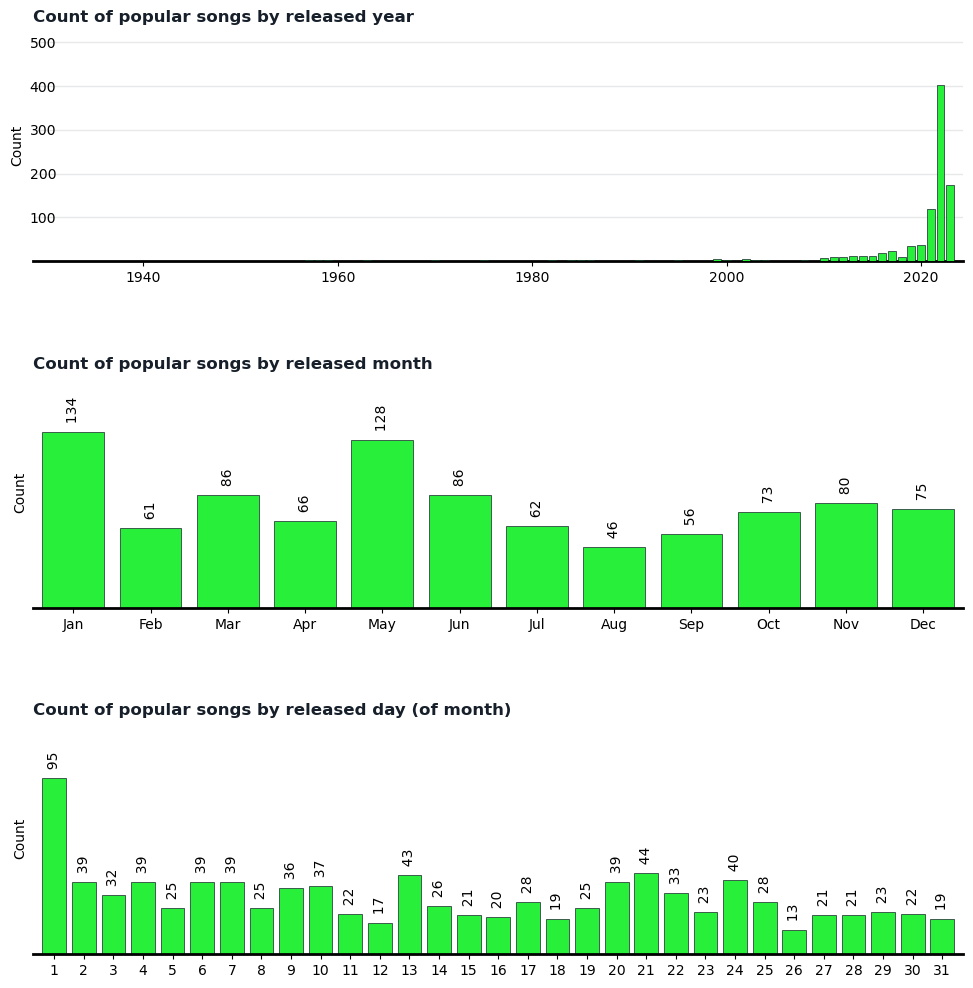

In [12]:
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
          'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

fig, ax = plt.subplots(3, 1, figsize=(12, 12))

ax[0].bar(df.released_year.value_counts().index,
          df.released_year.value_counts(), color='#27EF3A',  
          edgecolor='#17202A', lw=0.5, zorder=10)
bars1 = ax[1].bar(months,
                  df.released_month.value_counts().sort_index(), color='#27EF3A', 
                  edgecolor='#17202A', lw=0.5)
bars2 = ax[2].bar(df.released_day.value_counts().sort_index().index, 
                  df.released_day.value_counts().sort_index(), color='#27EF3A',
                  edgecolor='#17202A', lw=0.5)

for axi in ax:
    axi.margins(x=0.01)
    axi.spines[['left', 'right', 'top']].set_visible(False)
    axi.spines['bottom'].set_lw(2)
    axi.set_ylim(0, 1.25*axi.get_ylim()[-1])
    
for i, bar in enumerate(bars1 + bars2):
    axi = ax[1] if i < len(bars1) else ax[2]
    x, y = bar.get_x() + bar.get_width()/2, bar.get_height()
    axi.text(s=f'  {y}', x=x, y=y, rotation=90, ha='center', va='bottom');
    
plt.setp(ax[1:], yticks=[])
ax[0].grid(color='#17202A', alpha=0.1, lw=1, axis='y')
ax[2].xaxis.set_major_locator(plt.MultipleLocator(1))

ax[0].yaxis.set_major_locator(plt.MultipleLocator(100))
ax[0].tick_params(axis='y', left=False, pad=-20)
ax[0].yaxis.set_major_formatter(plt.FuncFormatter(lambda yi, ri: f'{yi:.0f}' if yi>0 else ''))

ax[0].set_title('Count of popular songs by released year', loc='left', 
                fontweight='bold', color='#17202A')
ax[1].set_title('Count of popular songs by released month', loc='left', 
                fontweight='bold', color='#17202A')
ax[2].set_title('Count of popular songs by released day (of month)', loc='left', 
                fontweight='bold', color='#17202A')
plt.subplots_adjust(hspace=0.5)
plt.setp(ax, ylabel='Count')

The ``released year`` of the most popular spotify songs ranges from ``1930 to 2023``. However, almost ``9 out of 10`` of these popular songs are from the last ``10 years (88.5%)``. ``January`` and ``May`` are the months with ``most popular songs``. Also, the 1st day of the month seems to have a high number of popular songs (possibly, artists tend to release their music on the first day of the month).

In [13]:
# What is the most streamed song for each song release year?

release_years = df.released_year.unique()
indexes = []

for i in release_years:
    indexes.append(df[df.released_year == i].streams.idxmax())
    
most_streamed_each_year = df[['track_name', 'released_year', 'streams']].loc[indexes]

fig1 = px.bar(data_frame=most_streamed_each_year,
             x='released_year', y='streams',
             color='track_name')

fig1.update_layout(title='Most Streamed Song for each Release Year',
                  xaxis_title='Year',
                  yaxis_title='Number of Streams (Billions)',
                   width= 1000)

fig1.show()

array([[<Axes: title={'center': 'bpm'}>,
        <Axes: title={'center': 'danceability_%'}>,
        <Axes: title={'center': 'valence_%'}>],
       [<Axes: title={'center': 'energy_%'}>,
        <Axes: title={'center': 'acousticness_%'}>,
        <Axes: title={'center': 'instrumentalness_%'}>],
       [<Axes: title={'center': 'liveness_%'}>,
        <Axes: title={'center': 'speechiness_%'}>, <Axes: >]],
      dtype=object)

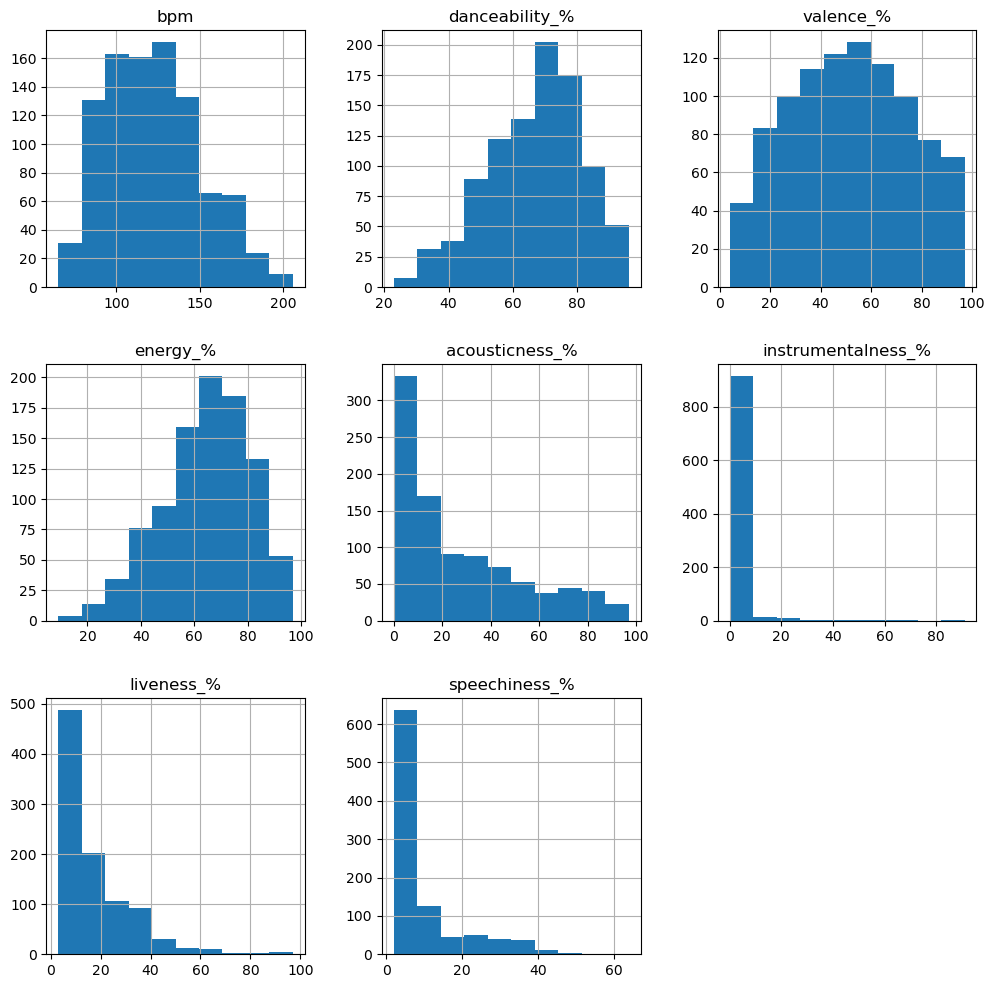

In [14]:
# How are the various song attributes distributed?
song_features = ['bpm', 'danceability_%', 'valence_%', 'energy_%',
'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%']

df[song_features].hist(figsize=(12,12))

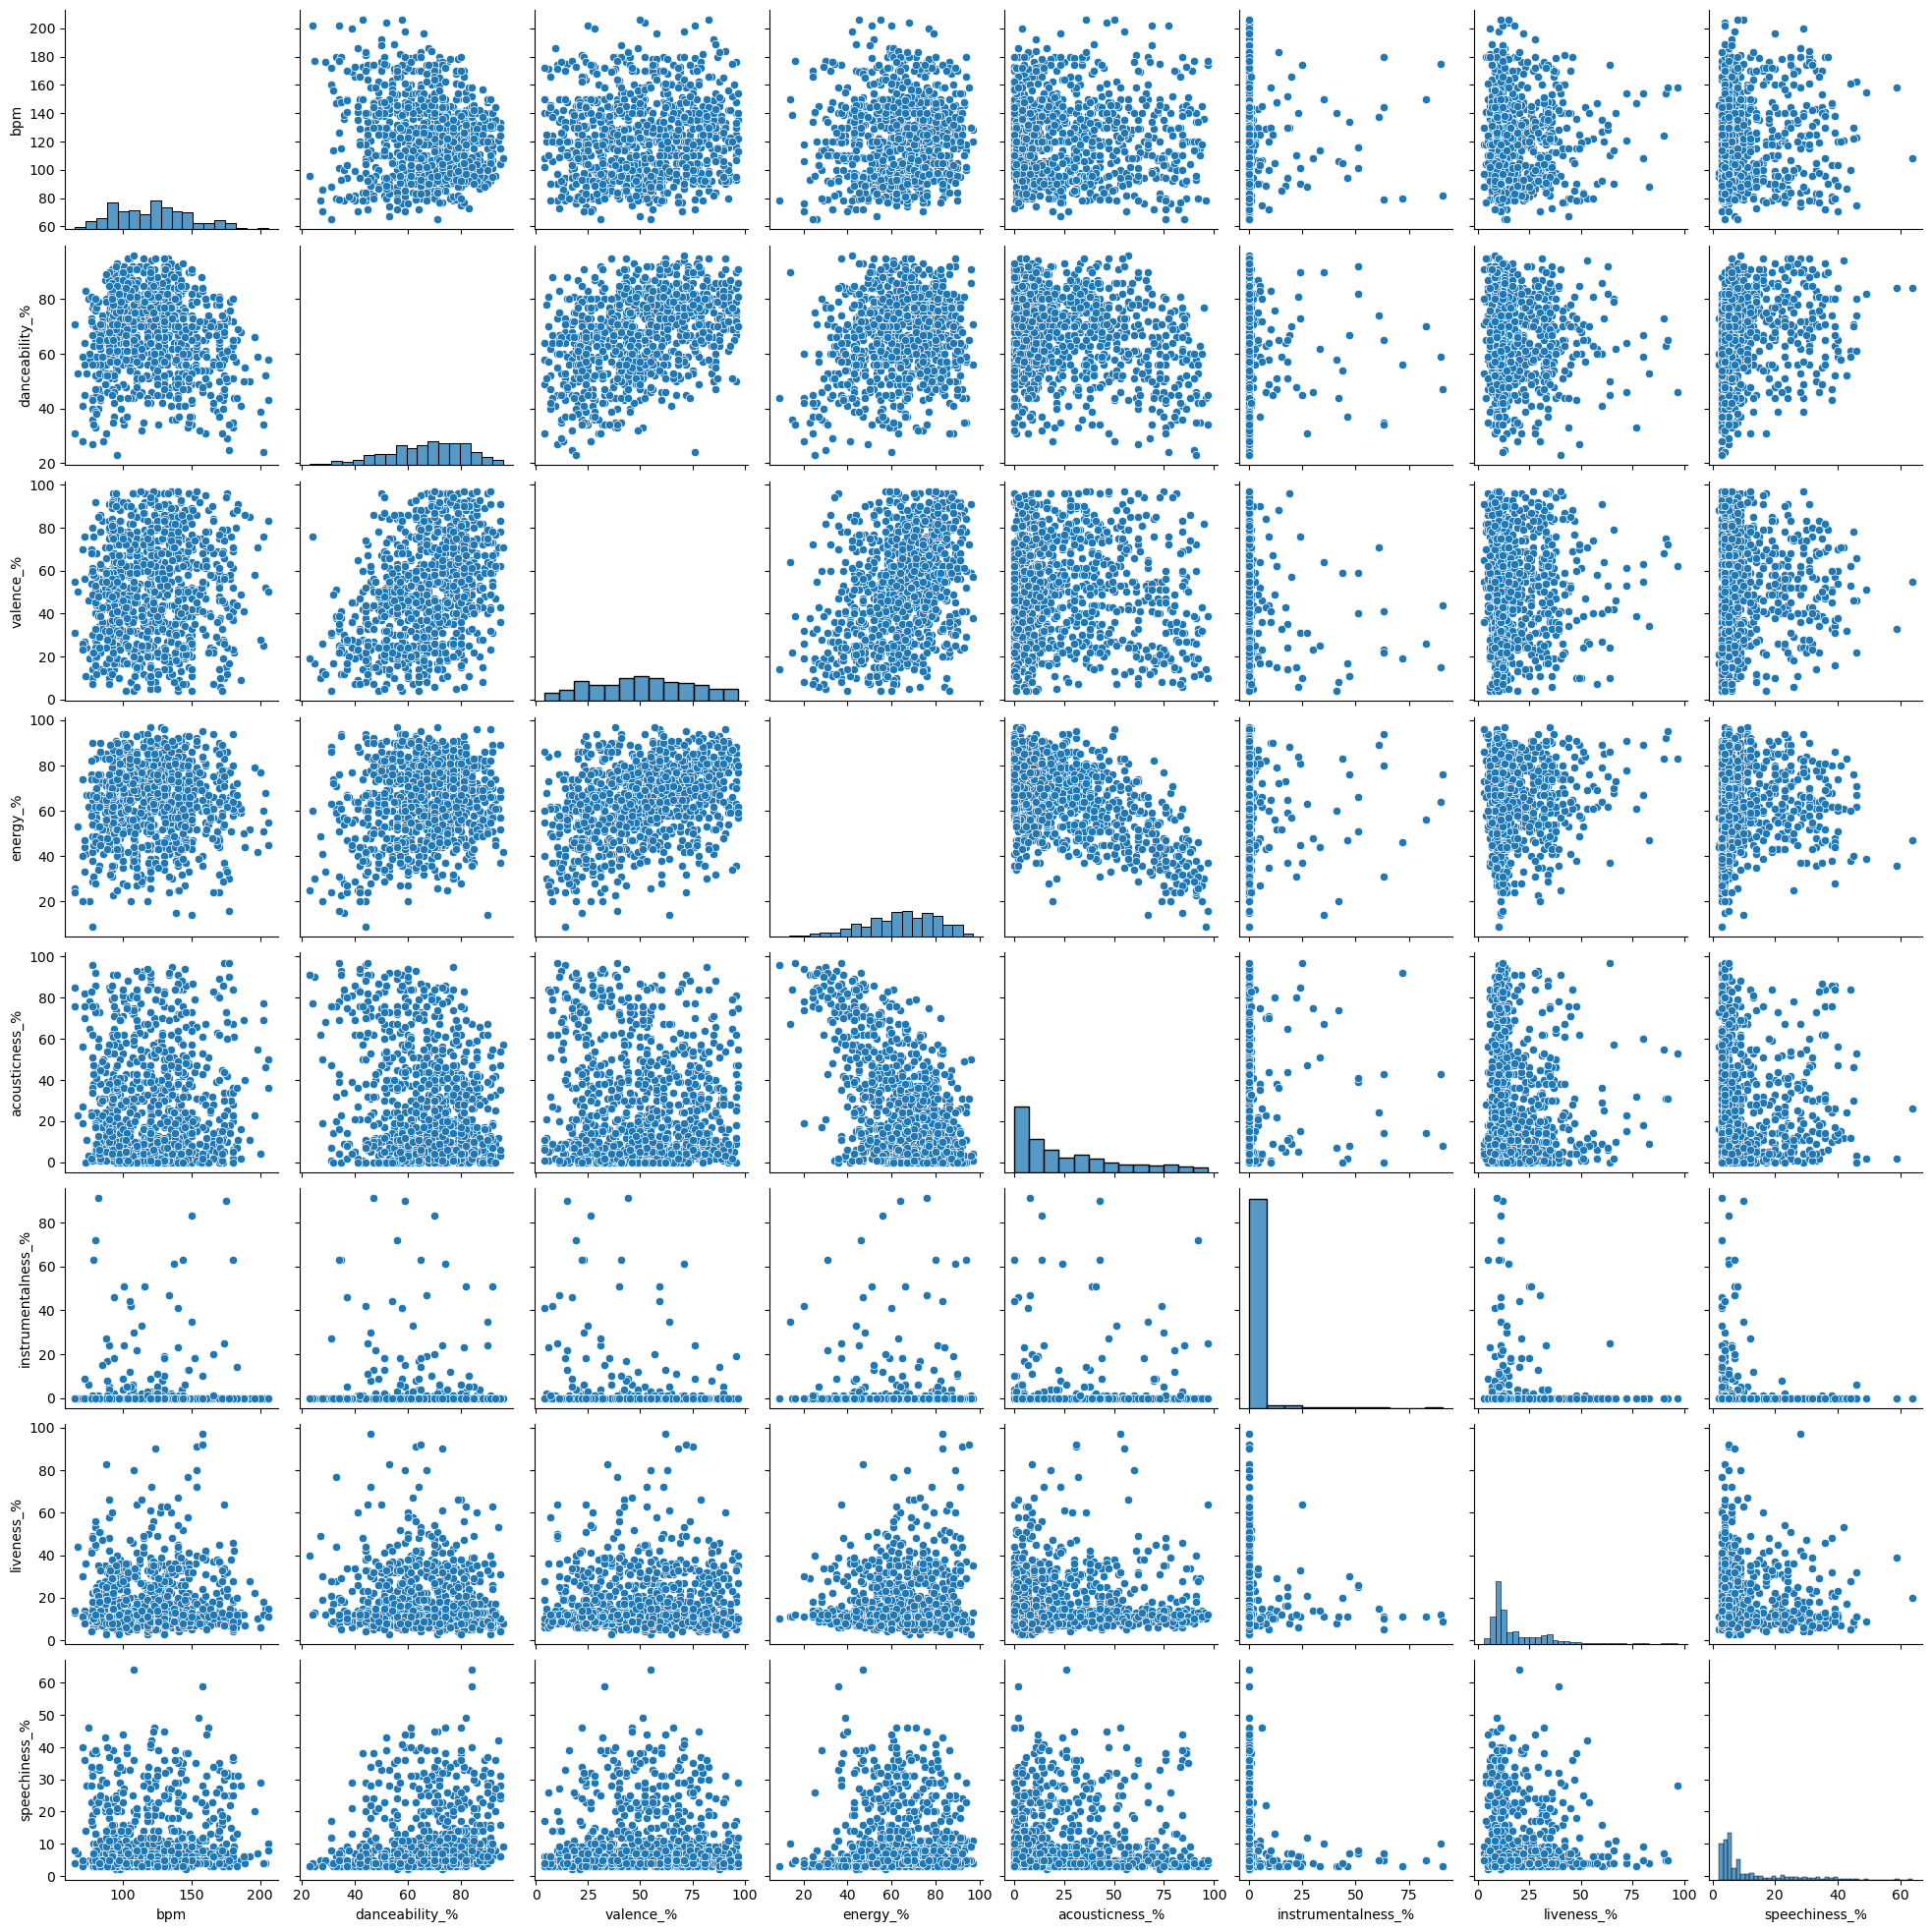

In [15]:
# Create a pairplot to visualise correlations in song features and streaming figures

df.replace({np.inf:np.nan, -np.inf:np.nan}, inplace=True) # Trying to get round the deprecation error
sns.pairplot(df[song_features])

Some song attributes appear positively correlated such as valence with energy and danceability.

There also appears to be a strong negative correlation between energy and accousticness.

Neither of these correlations are surprising and are in line with what you would expect.

<Axes: >

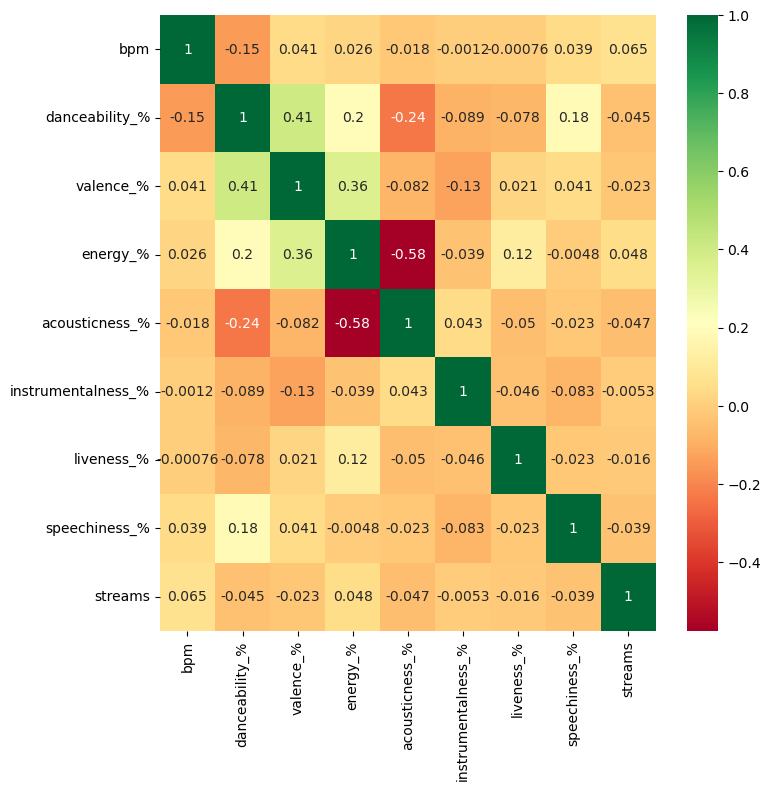

In [16]:
# Check correlation coefficients
song_features_streams = ['bpm', 'danceability_%', 'valence_%', 'energy_%',
'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%', 'streams']
plt.figure(figsize=(8,8))
sns.heatmap(df[song_features_streams].corr(), annot=True, cmap='RdYlGn')

In [17]:
df[song_features_streams].corr()['streams'][:-1]

bpm                   0.065395
danceability_%       -0.045192
valence_%            -0.022865
energy_%              0.048210
acousticness_%       -0.047474
instrumentalness_%   -0.005333
liveness_%           -0.016278
speechiness_%        -0.038834
Name: streams, dtype: float64

#### Oldest songs in the popular spotify songs list

In [18]:
oldest_songs = (
    df[df.released_year<1960]\
    [['released_year', 'artist(s)_name', 'track_name']]
    .reset_index(drop=True)
    .sort_values(by='released_year')
)

oldest_songs

released_year                                     artist(s)_name  \
0            1930                            Styrx, utku INC, Thezth   
7            1942  Bing Crosby, John Scott Trotter & His Orchestr...   
5            1946                                      Nat King Cole   
6            1950                  Frank Sinatra, B. Swanson Quartet   
4            1952                                          Burl Ives   
2            1957                                        Bobby Helms   
11           1957                                      Frank Sinatra   
1            1958                                         Brenda Lee   
8            1958  Perry Como, The Fontane Sisters, Mitchell Ayre...   
10           1958                                        Chuck Berry   
3            1959                                        Dean Martin   
9            1959                                      Nat King Cole   

                                           track_name  
0                                     Agudo Mï¿½ï¿½gi  
7                                     White Christmas  
5   The Christmas Song (Merry Christmas To You) - ...  
6              Let It Snow! Let It Snow! Let It Snow!  
4            A Holly Jolly Christmas - Single Version  
2                                    Jingle Bell Rock  
11                     Jingle Bells - Remastered 1999  
1                   Rockin' Around The Christmas Tree  
8   It's Beginning to Look a Lot Like Christmas (w...  
10                   Run Rudolph Run - Single Version  
3              Let It Snow! Let It Snow! Let It Snow!  
9                     Deck The Hall - Remastered 1999

Text(0.0, 1.0, 'Common words in oldest popular songs')

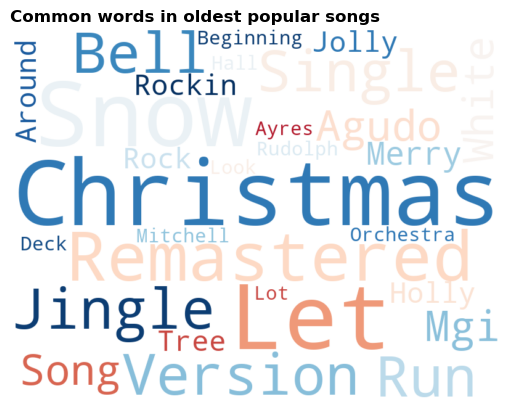

In [19]:
track_names = ' '.join(oldest_songs.track_name)
track_names = ''.join([char if char in string.ascii_letters + ' ' else '' for char in track_names])
track_names


# Crear una instancia de WordCloud
nube_palabras = WordCloud(background_color="white", max_words=200, width=800, height=600, 
                          colormap=plt.colormaps['RdBu'])

# Generar la nube de palabras
nube_palabras.generate(track_names.title())

# Mostrar la nube de palabras
plt.imshow(nube_palabras, interpolation="bilinear")
plt.axis("off")
plt.gca().set_title('Common words in oldest popular songs', loc='left', 
                    weight='bold')

#### Artists with most popular songs

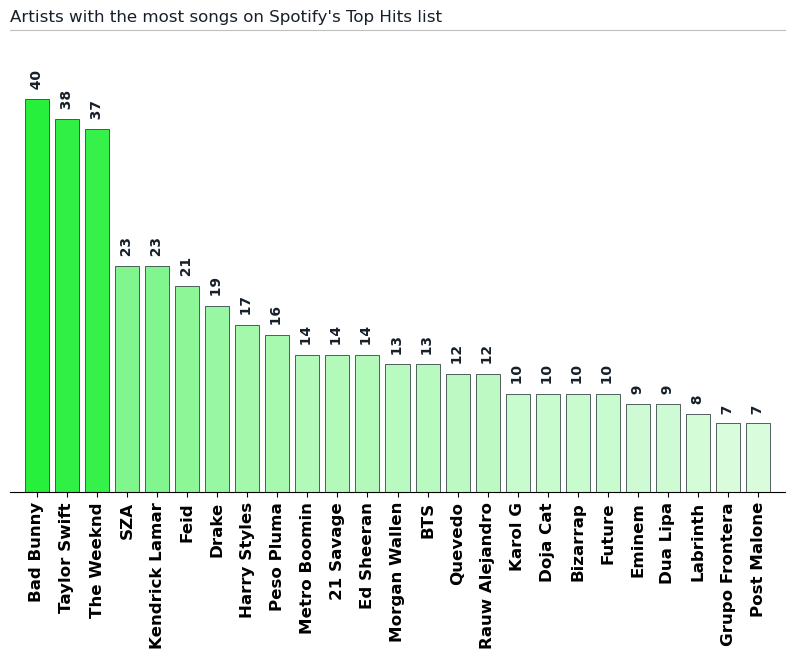

In [20]:
# We need to split artists in songs with multiple artists

count_by_artist = count_by_artist = pd.Series(','.join(df['artist(s)_name']).split(',')).str.strip().value_counts().head(25)

fig, ax = plt.subplots(figsize=(10, 6))
ax.margins(x=0.02)

colors = [(.15, .94, .23, vi/count_by_artist.max()) 
          for vi in count_by_artist]
bars = ax.bar(count_by_artist.index, count_by_artist, 
              color=colors, edgecolor='#17202A', lw=0.5)
ax.tick_params(axis='x', rotation=90)
for label in ax.get_xticklabels():
    label.set(ha='right')
ax.spines[['right', 'left']].set_visible(False)
ax.spines['top'].set_alpha(0.25)
ax.set_yticks([])

for bar in bars:
    ax.annotate(
        f'  {bar.get_height():.0f}', 
        xy=(bar.get_x() + bar.get_width()/2, bar.get_height()), 
        color='#17202A', 
        va='bottom', ha='center', rotation=90, 
        fontweight='bold'
    )
ax.set_title('Artists with the most songs on Spotify\'s Top Hits list', loc='left', 
             color='#17202A')
ax.set_ylim(0, ax.get_ylim()[1]+5)
for label in ax.get_xticklabels():
    label.set(fontsize=12, fontweight='bold', ha='center')

Bad Bunny dominates Spotify's popular songs list with an impressive 40 songs! Taylor Swift and The Weeknd follow closely behind with 38 and 37 songs, respectively. A high gap of 14 splits the third and fourth places.

#### Songs with the highest number of artists

In [21]:
df.sort_values(by='artist_count', ascending=False).head(12)[['track_name',  'artist(s)_name', 'artist_count',]].reset_index(drop=True)

track_name  \
0                                            Se Le Ve   
1                                     Los del Espacio   
2   Cayï¿½ï¿½ La Noche (feat. Cruz Cafunï¿½ï¿½, Ab...   
3                           We Don't Talk About Bruno   
4                                   Jhoome Jo Pathaan   
5                  Nobody Like U - From "Turning Red"   
6                      Besharam Rang (From "Pathaan")   
7                                    ULTRA SOLO REMIX   
8                                    Marisola - Remix   
9   Angel Pt 1 (feat. Jimin of BTS, JVKE & Muni Long)   
10        Tere Vaaste (From "Zara Hatke Zara Bachke")   
11  Link Up (Metro Boomin & Don Toliver, Wizkid fe...   

                                       artist(s)_name  artist_count  
0   Arcangel, De La Ghetto, Justin Quiles, Lenny T...             8  
1   Big One, Duki, Lit Killah, Maria Becerra, FMK,...             8  
2   Quevedo, La Pantera, Juseph, Cruz Cafunï¿½ï¿½,...             7  
3   Adassa, Mauro Castillo, Stephanie Beatriz, Enc...             7  
4   Arijit Singh, Vishal Dadlani, Sukriti Kakar, V...             6  
5   Jordan Fisher, Josh Levi, Finneas O'Connell, 4...             6  
6   Vishal-Shekhar, Shilpa Rao, Caralisa Monteiro,...             6  
7   De La Ghetto, Feid, Polima WestCoast, Paloma M...             5  
8   Duki, NICKI NICOLE, Cris Mj, Standly, Stars Mu...             5  
9     Kodak Black, NLE Choppa, Muni Long, JVKE, Jimin             5  
10  Sachin-Jigar, Shadab Faridi, Altamash Faridi, ...             5  
11     WizKid, Toian, Metro Boomin, Don Toliver, Beam             5

#### Top tracks by the number of playlists they're included in

In [22]:
df['in_playlists_count'] = df.in_spotify_playlists +\
                             df.in_deezer_playlists +\
                             df.in_apple_playlists
df['in_charts_count'] = df.in_spotify_charts +\
                          df.in_deezer_charts +\
                          df.in_apple_charts

In [23]:
in_playlists_data = (
    df
    .sort_values(by='in_playlists_count', ascending=False)
    .head(10)
    [['track_name', 'artist(s)_name', 'in_spotify_playlists', 'in_deezer_playlists', 'in_apple_playlists', 'in_playlists_count']]
)
in_playlists_data

track_name  \
624  Smells Like Teen Spirit - Remastered 2021   
757                     Get Lucky - Radio Edit   
720                    Wake Me Up - Radio Edit   
630                             Mr. Brightside   
199                                 Take On Me   
727               Somebody That I Used To Know   
871                        Sweet Child O' Mine   
55                             Blinding Lights   
162                                  One Dance   
717        Bohemian Rhapsody - Remastered 2011   

                                 artist(s)_name  in_spotify_playlists  \
624                                     Nirvana                 49991   
757  Pharrell Williams, Nile Rodgers, Daft Punk                 52898   
720                                      Avicii                 50887   
630                                 The Killers                 51979   
199                                        a-ha                 44927   
727                               Gotye, Kimbra                 42798   
871                               Guns N' Roses                 41231   
55                                   The Weeknd                 43899   
162                         Drake, WizKid, Kyla                 43257   
717                                       Queen                 40112   

     in_deezer_playlists  in_apple_playlists  in_playlists_count  
624                12367                 265               62623  
757                 8215                 203               61316  
720                 6284                 315               57486  
630                 5063                 306               57348  
199                 5108                  34               50069  
727                 6508                 217               49523  
871                 6720                 228               48179  
55                  3421                 672               47992  
162                 3631                 433               47321  
717                 5691                 321               46124

Text(0.0, 1.0, 'Top songs by the total number of playlists they are included in')

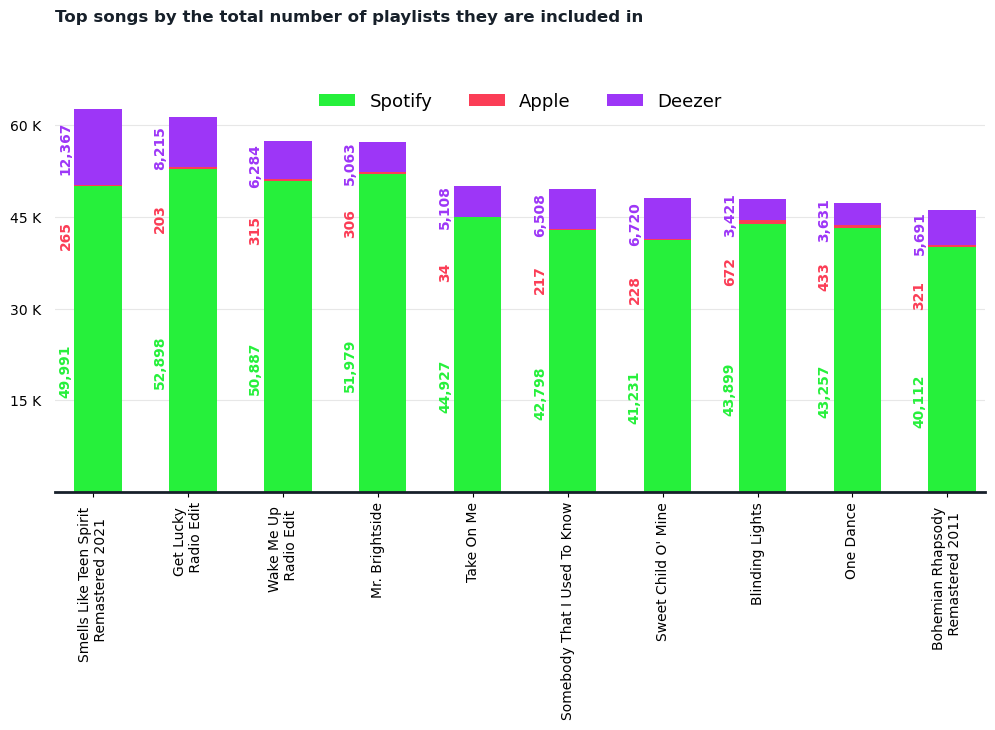

In [24]:
fig, ax = plt.subplots(figsize=(12, 6))

ax.margins(x=0)

bars1 = ax.bar(in_playlists_data['track_name'].str.replace('-', '\n'), 
               in_playlists_data['in_spotify_playlists'], 
               color='#26F03B', 
               label='Spotify', zorder=5)
bars2 = ax.bar(in_playlists_data['track_name'].str.replace('-', '\n'), 
               in_playlists_data['in_apple_playlists'], 
               bottom=in_playlists_data['in_spotify_playlists'], 
               color='#FB3D56', 
               label='Apple', zorder=5)
bars3 = ax.bar(in_playlists_data['track_name'].str.replace('-', '\n'), 
               in_playlists_data['in_deezer_playlists'], 
               bottom= in_playlists_data['in_spotify_playlists'] + in_playlists_data['in_apple_playlists'], 
               color='#9D36F7', 
               label='Deezer', zorder=5)

ax.tick_params(axis='x', rotation=90, )
ax.legend(fontsize=13, ncols=3, loc='upper center', bbox_to_anchor=(0.5, 0.9), 
          fancybox=False, shadow=False, edgecolor='none')
ax.set_ylim(0, 1.15 * ax.get_ylim()[1])
ax.spines[['top', 'right', 'left']].set_visible(False)
ax.spines['bottom'].set(lw=2, color='#17202A', zorder=10)
ax.tick_params(left=False)

for bar in bars1 + bars2 + bars3:
    bar.set_x(bar.get_x() + 0.2)
    bar.set_width(0.5)
    x = bar.get_x() - 0.02
    ycent = bar.get_y() + bar.get_height()/2
    color = bar.get_facecolor()
    val = bar.get_height()
    if bar in bars2:
        ycent -= 10000
    if bar in bars3:
        ycent -= 4000
    if bar in bars1:
        ycent -= 9000
    ax.annotate(f'{val:,}', xy=(x,ycent), color=color, 
                ha='right', rotation=90, fontweight='bold', va='baseline')
ax.grid(zorder=0, axis='y', alpha=0.3)

ax.set_yticks([15000, 30000, 45000, 60000], 
              ['15 K ', '30 K ', '45 K ', '60 K '])
ax.set_title('Top songs by the total number of playlists they are included in', 
             fontweight='bold', color='#17202A', loc='left')

Smells Like Teen Spirit is the track included in most playlist (across all 3 platforms) which is more than 60 thousand, followed by Get Lucky (Daft Punk), also with more than 60 thusands. The rest of the top 5 are: Wake Me Up (Avicci), Mr. Bridgestone (The killers), Take on Me (a-Ha).

There is a huge gap between the number of playlists including the tracks in Spotify and the other two platforms (Apple Music and Deezer).

#### Top tracks by total streams

Text(0.0, 1.0, 'Top tracks by number of strems')

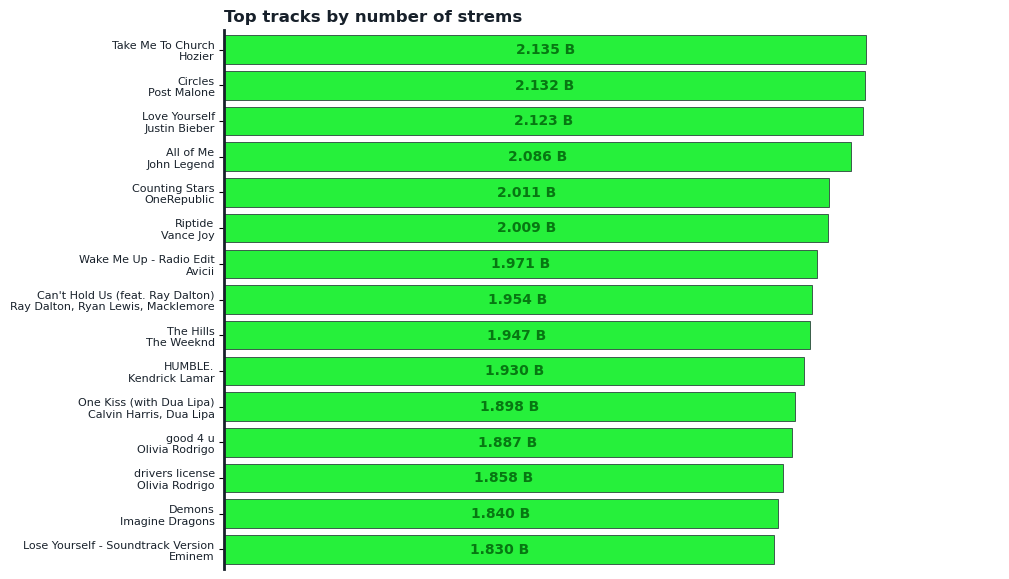

In [25]:
top_tracks_by_streams = (
    df.sort_values(by='streams', ascending=False)
    [['track_name', 'artist(s)_name', 'streams']]
    .head(15)
)

fig, ax = plt.subplots(figsize=(10, 7))
ax.margins(y=0.01)

bars = ax.barh(top_tracks_by_streams.track_name + '\n' + top_tracks_by_streams['artist(s)_name'],
               top_tracks_by_streams.streams,
              color='#26F03B', edgecolor='#17202A', lw=0.5)
ax.tick_params(axis='y', labelsize=8, labelcolor='#17202A')

ax.spines[['bottom', 'top', 'right']].set_visible(False)
ax.spines['left'].set(lw=2, color='#17202A', zorder=5)
ax.set_xlim(0, ax.get_xlim()[1]*1.15)
ax.set_ylim(reversed(ax.get_ylim()))
ax.set_xticks([])

for bar in bars:
    ax.annotate(
        text=f'{bar.get_width()/1_000_000_000:,.3f} B',
        xy = (bar.get_width()/2, bar.get_y() + bar.get_height()/2),
        ha='center', va='center', rotation=0, 
        color='#077712', fontweight='bold', 
        fontsize=10    )
ax.set_title('Top tracks by number of strems', color='#17202A', 
             fontweight='bold', loc='left')